БВТ2201 Шамсутдинов Рустам

Лабораторная работа № 4


In [639]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt


In [640]:
def t_normal(N, k1, k2, k3, k4):
    array = []

    for _ in range(N):
        k1 = random.uniform(0, k1) 
        k2 = random.uniform(0, k2)
        k3 = random.uniform(0, k3)
        k4 = random.uniform(0, k4)
        array.append(k1 + k2 + k3 + k4)


    return array

In [641]:
def mathematical_expectation(values, N):
    return sum(values) / N

In [642]:
def disspersion(values, N):
    
    M = mathematical_expectation(values, N)
    sum_sq = sum([x**2 for x in values])

    D = (sum_sq / N - M ** 2) * N / (N - 1)

    return D

In [643]:
def sqrt_mean_error(values, N):
    D = disspersion(values, N)

    return math.sqrt(D)

In [644]:
def GetFreqData(values, A, B, IntervalsCount):

    dY = (B - A) / IntervalsCount
    Freq = [0] * IntervalsCount

    for j in range(len(values)):
        
        Yc = values[j]
        FN = math.floor(Yc / dY)
        Freq[FN] += 1

    for i in range(IntervalsCount):
        Freq[i] = Freq[i] / (len(values) * dY)

    return Freq


In [645]:
def PlotFreqData(freq, A, B, IntervalsCount):
    # Вычисляем ширину интервала
    dY = (B - A) / IntervalsCount
    # Создаем список с центрами интервалов для оси X
    intervals = [A + (i + 0.5) * dY for i in range(IntervalsCount)]
    
    # Строим график
    plt.bar(intervals, freq, width=dY, edgecolor='black', alpha=0.7)
    plt.xlabel('Интервалы')
    plt.ylabel('Нормализованная частота')
    plt.title('Гистограмма нормализованной частоты')
    plt.grid(False)
    plt.show()


In [646]:
def theoretical_mathematical_expectation(k1, k2, k3, k4):
    M = ((k1 + 0) / 2) + ((k2 + 0) / 2) + ((k3 + 0) / 2) + ((k4 + 0) / 2)

    return M

In [647]:
def theoretical_dispersion(k1, k2, k3, k4):

    D = ((k1 - 0)**2 / 12) + ((k2 - 0)**2 / 12) + ((k3 - 0)**2 / 12) + ((k4 - 0)**2 / 12)
    
    return D

In [648]:
def theoretical_sqrt_mean_error(k1, k2, k3, k4):

    D = theoretical_dispersion(k1, k2, k3, k4)

    return math.sqrt(D)

In [649]:
def theoretical_distribution_density(x, M, D):
    m = M
    S = math.sqrt(D)
    power = -0.5 * ((x - m) / S) ** 2

    f = math.exp(power) / (S * math.sqrt(2 * math.pi)) 

    return f
    

In [650]:
def get_pdf_array(values, M, D):

    new_values = []
    for x in values:
        f = theoretical_distribution_density(x, M, D)
        new_values.append(f)

    return  new_values

In [651]:
def plotPDF(values, M, D):

    # Построение гистограммы
    plt.hist(values, bins=10, density=True, alpha=0.7, color='b', label='Гистограмма частот')

    # Плотность нормального распределения
    xmin, xmax = plt.xlim()
    x = np.linspace(min(values), 30, len(values))
    y = get_pdf_array(values, M, D)

    # Построение графика плотности
    plt.plot(x, y, 'k', linewidth=2, label='Нормальная плотность')

    # Легенда и отображение
    plt.legend(loc='upper right')
    plt.title('Гистограмма и плотность нормального распределения')
    plt.show()

    

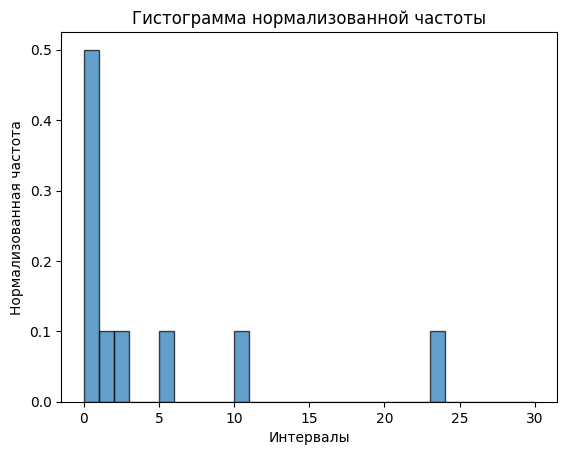

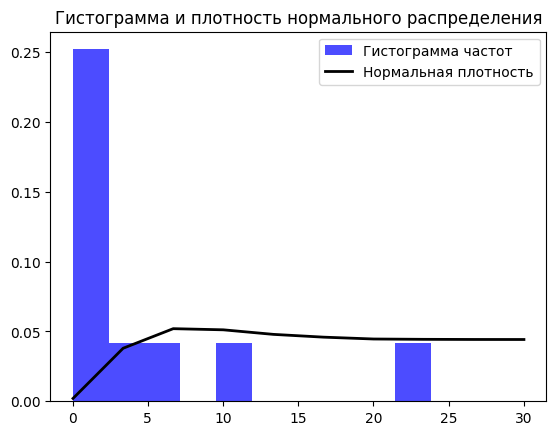

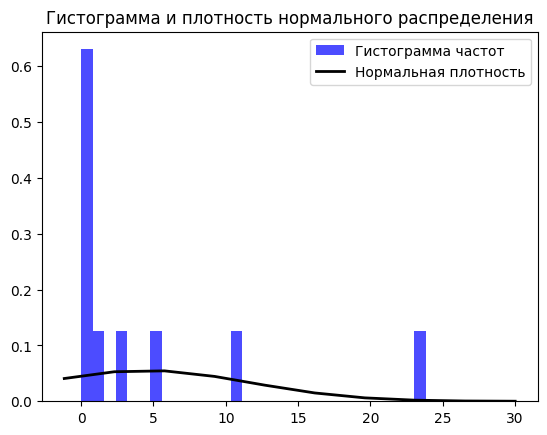

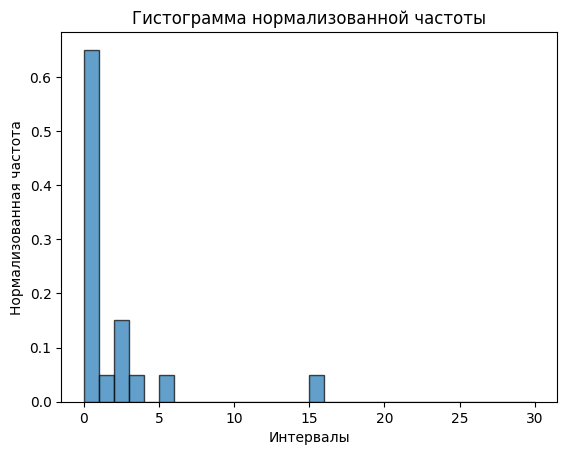

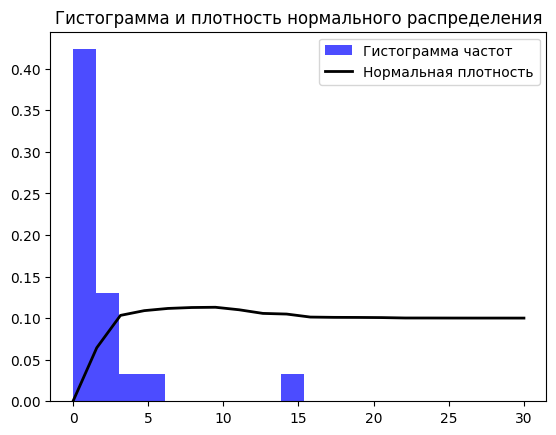

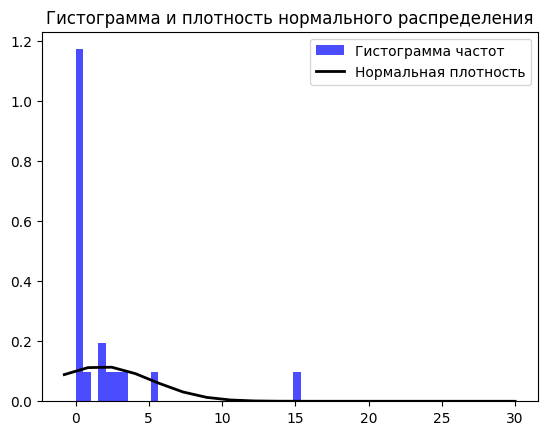

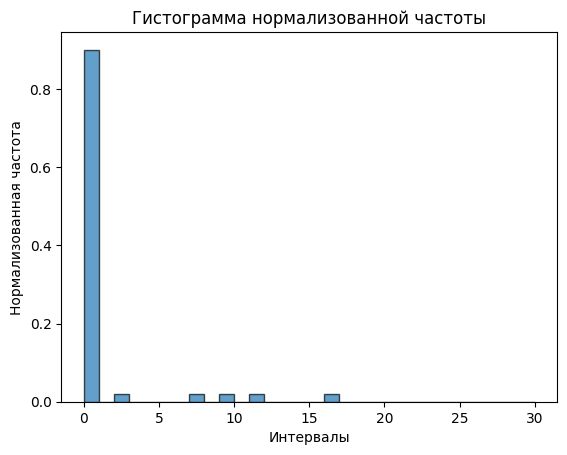

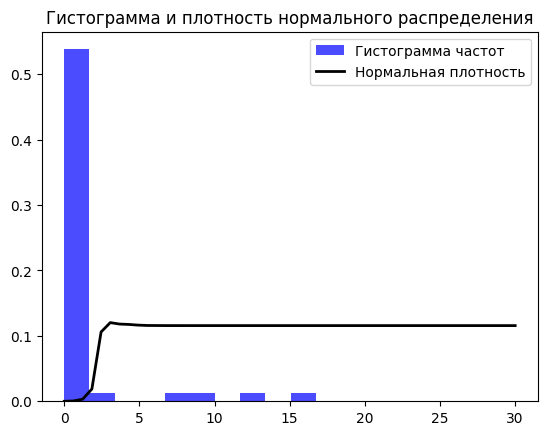

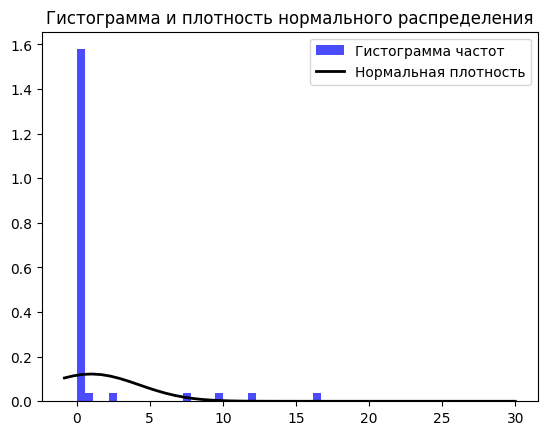

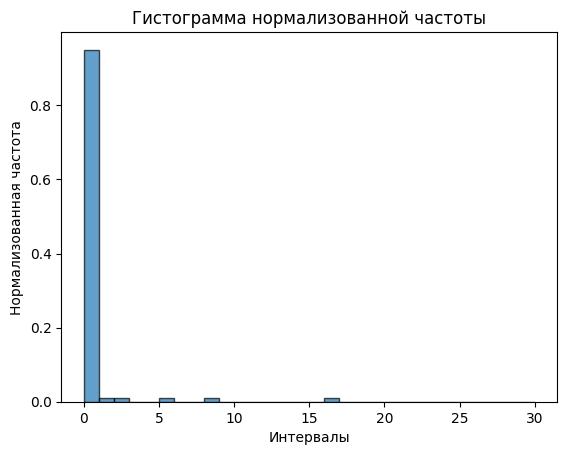

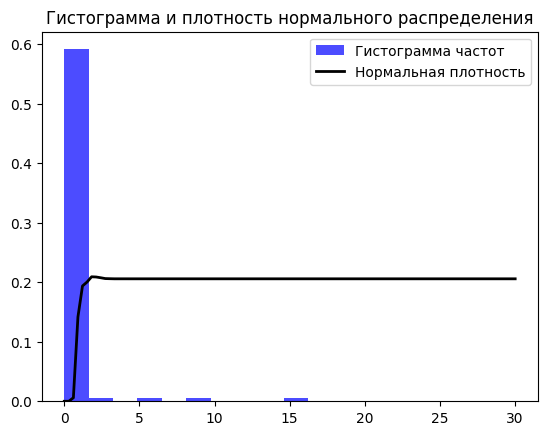

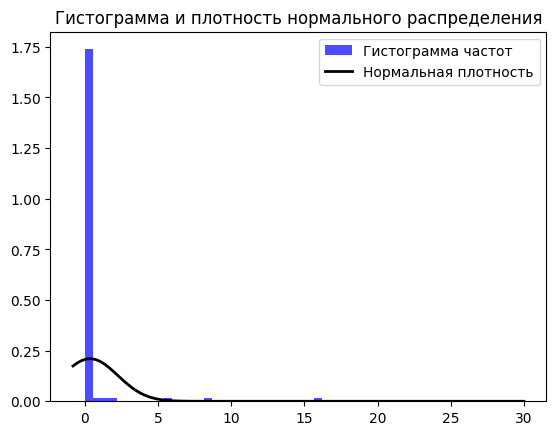

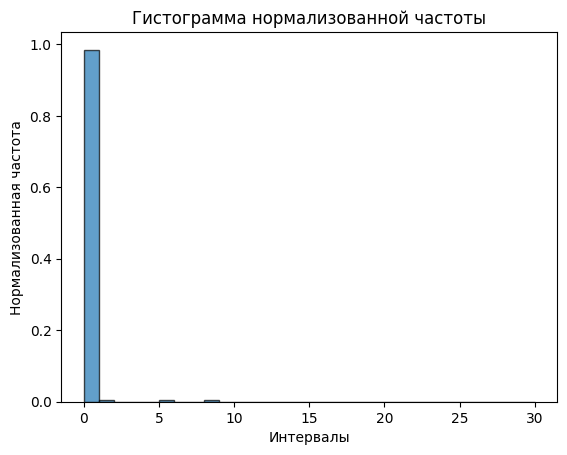

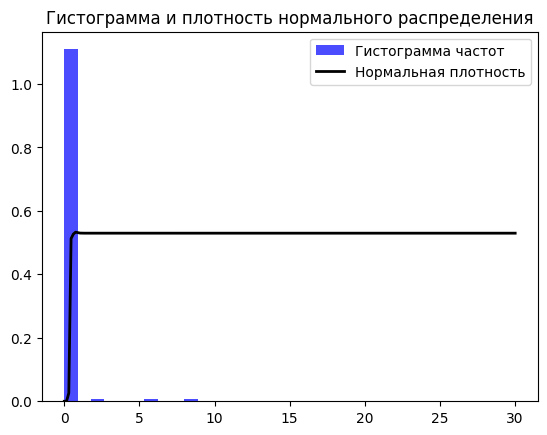

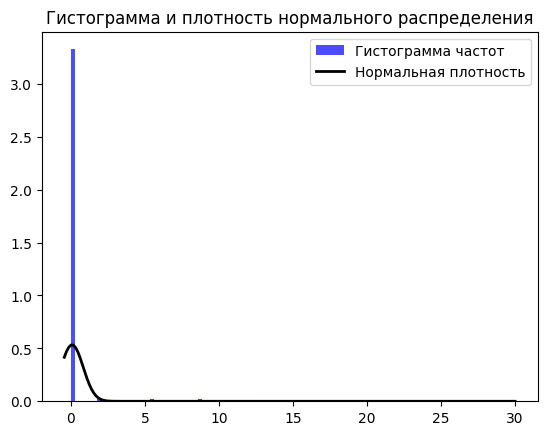

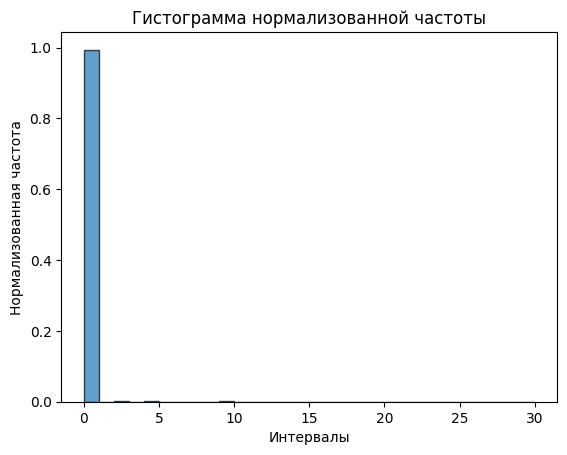

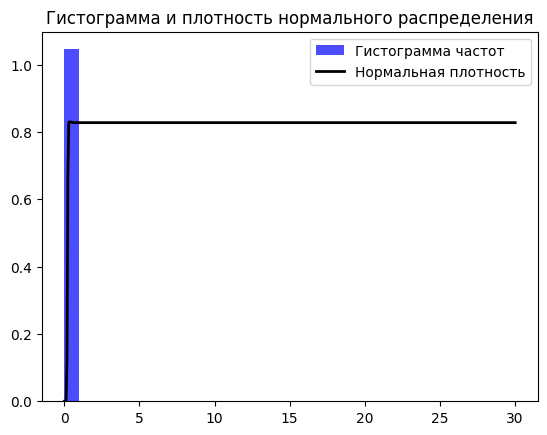

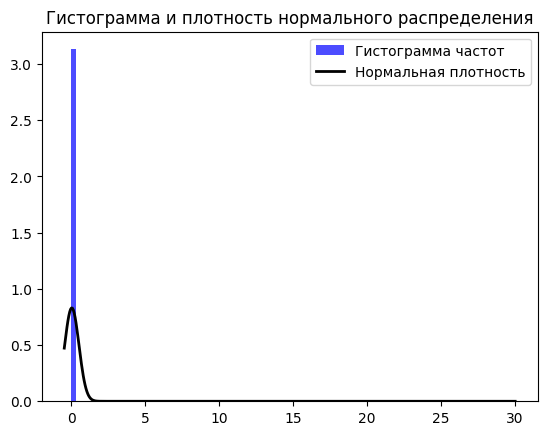

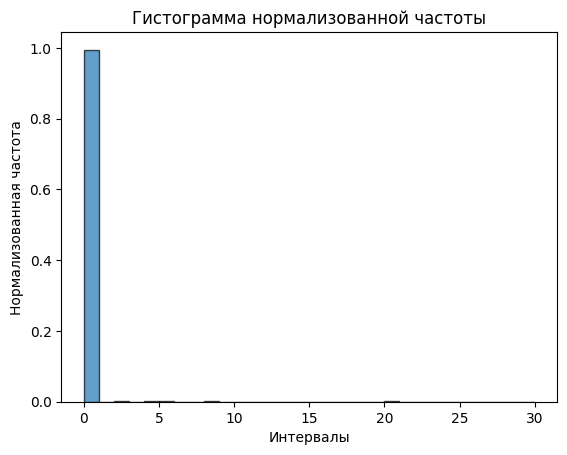

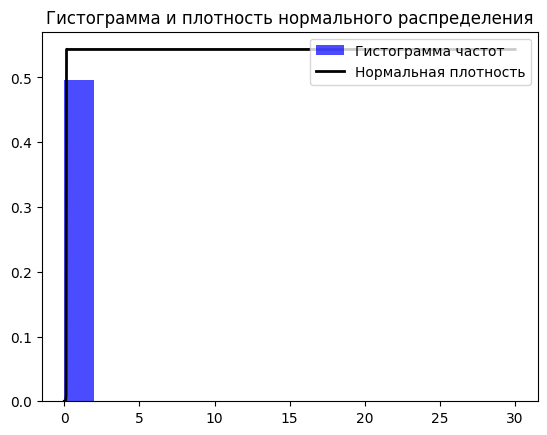

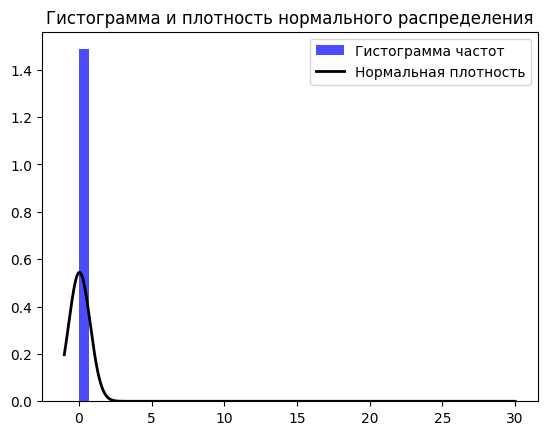

In [652]:
k1 = 3
k2 = 7
k3 = 14
k4 = 6

N_values= [10, 20, 50, 100, 200, 500, 10**3]

for N in N_values:

    random_values = t_normal(N=N, k1=k1, k2=k2, k3=k3, k4=k4)

    M = mathematical_expectation(random_values, N)
    D = disspersion(random_values, N)
    SME = sqrt_mean_error(random_values, N)

    

    tM = theoretical_mathematical_expectation(k1, k2, k3, k4)
    tD = theoretical_dispersion(k1, k2, k3, k4)
    tSME = theoretical_sqrt_mean_error(k1, k2, k3, k4)

    # print(f"\nСопоставление теоретических и практических результатов:\n")
    # print(f"Математическое ожидание: Практическое = {M:.4f}, Теоретическое = {tM:.4f}")
    # print(f"Дисперсия: Практическое = {D:.4f}, Теоретическое = {tD:.4f}")
    # print(f"Среднеквадратическая ошибка: Практическое = {SME:.4f}, Теоретическое = {tSME:.4f}")
    

    Freq = GetFreqData(random_values, 0, k1+k2+k3+k4, IntervalsCount=30)
    PlotFreqData(Freq, 0, k1+k2+k3+k4, IntervalsCount=30)

    plotPDF(random_values, M, D)





    from scipy.stats import norm

    # Параметры нормального распределения
    mu, sigma = np.mean(random_values), np.std(random_values)

    # Построение гистограммы
    plt.hist(random_values, bins=30, density=True, alpha=0.7, color='b', label='Гистограмма частот')

    # Плотность нормального распределения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, 30, len(random_values))
    p = norm.pdf(x, mu, sigma)

    # Построение графика плотности
    plt.plot(x, p, 'k', linewidth=2, label='Нормальная плотность')

    # Легенда и отображение
    plt.legend(loc='upper right')
    plt.title('Гистограмма и плотность нормального распределения')
    plt.show()

    # break
    

    

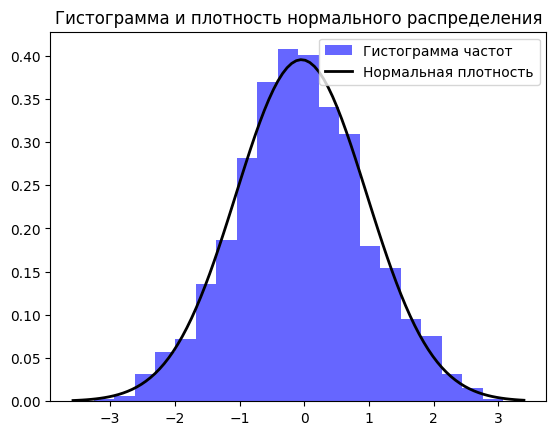

In [653]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Пример данных - список случайных величин
data = np.random.normal(0, 1, 1000)

# Параметры нормального распределения
mu, sigma = np.mean(data), np.std(data)

# Построение гистограммы
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Гистограмма частот')

# Плотность нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Построение графика плотности
plt.plot(x, p, 'k', linewidth=2, label='Нормальная плотность')

# Легенда и отображение
plt.legend(loc='upper right')
plt.title('Гистограмма и плотность нормального распределения')
plt.show()
